In [1]:
from fastlane_bot.bot import CarbonBot as Bot#, Config, ConfigDB, ConfigNetwork, ConfigProvider
from fastlane_bot.tools.cpc import ConstantProductCurve as CPC, CPCContainer, T, Pair
from fastlane_bot.tools.analyzer import CPCAnalyzer
from fastlane_bot.tools.optimizer import SimpleOptimizer, MargPOptimizer, ConvexOptimizer
from fastlane_bot.tools.arbgraphs import ArbGraph
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPC))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(CPCAnalyzer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(SimpleOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(MargPOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ConvexOptimizer))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(ArbGraph))
print("{0.__name__} v{0.__VERSION__} ({0.__DATE__})".format(Bot))
from fastlane_bot.testing import *
import itertools as it
import collections as cl
plt.style.use('seaborn-dark')
plt.rcParams['figure.figsize'] = [12,6]
from fastlane_bot import __VERSION__
require("3.0", __VERSION__)

Using default database url, if you want to use a different database, set the backend_url found at the bottom of manager_base.py
Error adding Ethereum blockchain to database Ethereum, (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "ix_blockchains_name"
DETAIL:  Key (name)=(Ethereum) already exists.

[SQL: INSERT INTO blockchains (name, block_number) VALUES (%(name)s, %(block_number)s) RETURNING blockchains.id]
[parameters: {'name': 'Ethereum', 'block_number': 0}]
(Background on this error at: http://sqlalche.me/e/14/gkpj) skipping...
Error adding exchange carbon_v1 to database, (psycopg2.errors.UniqueViolation) duplicate key value violates unique constraint "exchanges_pkey"
DETAIL:  Key (id)=(6) already exists.

[SQL: INSERT INTO exchanges (id, name, blockchain_name) VALUES (%(id)s, %(name)s, %(blockchain_name)s)]
[parameters: {'id': 6, 'name': 'carbon_v1', 'blockchain_name': 'Ethereum'}]
(Background on this error at: http://sqlalche.me/e/14/gkpj) skipp

# Mainnet Arbitrage Dashboard [A014]

In [2]:
bot     = Bot()
CCm     = bot.get_curves()
fn = f"../data/A014-{int(time.time())}.csv.gz"
print (f"Saving as {fn}")
CCm.asdf().to_csv(fn, compression = "gzip")

Saving as ../data/A014-1683969349.csv.gz


In [3]:
!ls ../data

A014-1683963279.csv.gz A014-1683963372.csv.gz
A014-1683963346.csv.gz A014-1683969349.csv.gz


In [4]:
#CCm     = CPCContainer.from_df(pd.read_csv("../data/A014-1683963372.csv.gz"))
CCu3    = CCm.byparams(exchange="uniswap_v3")
CCu2    = CCm.byparams(exchange="uniswap_v2")
CCs2    = CCm.byparams(exchange="sushiswap_v2")
CCc1    = CCm.byparams(exchange="carbon_v1")
tc_u3   = CCu3.token_count(asdict=True)
tc_u2   = CCu2.token_count(asdict=True)
tc_s2   = CCs2.token_count(asdict=True)
tc_c1   = CCc1.token_count(asdict=True)
CAm     = CPCAnalyzer(CCm)

## Market structure analysis

In [5]:
CA = CAm
pairs0  = CA.CC.pairs(standardize=False)
pairs   = CA.pairs()
pairsc  = CA.pairsc()
tokens  = CA.tokens()

In [6]:
print(f"Total pairs:    {len(pairs0):4}")
print(f"Primary pairs:  {len(pairs):4}")
print(f"...carbon:      {len(pairsc):4}")
print(f"Tokens:         {len(CA.tokens()):4}")
print(f"Curves:         {len(CCm):4}")

Total pairs:      45
Primary pairs:    28
...carbon:        26
Tokens:           23
Curves:           97


In [7]:
CA.count_by_pairs()

,count
pair,
WETH-6Cc2/USDC-eB48,19
BNT-FF1C/vBNT-7f94,10
BNT-FF1C/WETH-6Cc2,10
USDT-1ec7/USDC-eB48,6
LINK-86CA/USDT-1ec7,3
CRV-cd52/USDC-eB48,3
stETH-fE84/WETH-6Cc2,3
DAI-1d0F/USDC-eB48,3
WBTC-C599/USDC-eB48,3


In [8]:
CA.count_by_pairs(minn=2)

,count
pair,
WETH-6Cc2/USDC-eB48,19
BNT-FF1C/vBNT-7f94,10
BNT-FF1C/WETH-6Cc2,10
USDT-1ec7/USDC-eB48,6
LINK-86CA/USDT-1ec7,3
CRV-cd52/USDC-eB48,3
stETH-fE84/WETH-6Cc2,3
DAI-1d0F/USDC-eB48,3
WBTC-C599/USDC-eB48,3


## Carbon

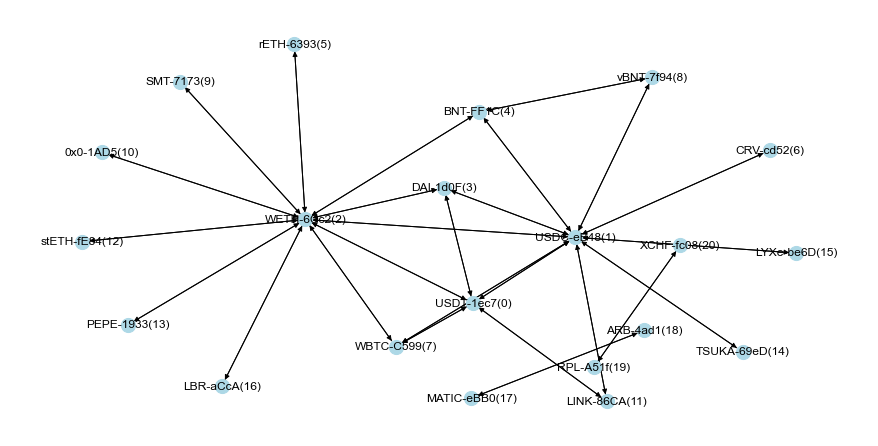

In [9]:
ArbGraph.from_cc(CCc1).plot()._

In [10]:
len(CCc1), len(CCc1.tokens())

(75, 21)

In [11]:
CCc1.token_count()

[('WETH-6Cc2', 41),
 ('USDC-eB48', 35),
 ('BNT-FF1C', 20),
 ('USDT-1ec7', 12),
 ('vBNT-7f94', 10),
 ('DAI-1d0F', 5),
 ('WBTC-C599', 5),
 ('LINK-86CA', 3),
 ('CRV-cd52', 2),
 ('0x0-1AD5', 2),
 ('stETH-fE84', 2),
 ('PEPE-1933', 2),
 ('MATIC-eBB0', 2),
 ('ARB-4ad1', 2),
 ('rETH-6393', 1),
 ('SMT-7173', 1),
 ('TSUKA-69eD', 1),
 ('LYXe-be6D', 1),
 ('LBR-aCcA', 1),
 ('RPL-A51f', 1),
 ('XCHF-fc08', 1)]

In [12]:
len(CCc1.pairs()), CCc1.pairs()

(26,
 {'0x0-1AD5/WETH-6Cc2',
  'ARB-4ad1/MATIC-eBB0',
  'BNT-FF1C/USDC-eB48',
  'BNT-FF1C/WETH-6Cc2',
  'BNT-FF1C/vBNT-7f94',
  'CRV-cd52/USDC-eB48',
  'DAI-1d0F/USDC-eB48',
  'DAI-1d0F/USDT-1ec7',
  'LBR-aCcA/WETH-6Cc2',
  'LINK-86CA/USDC-eB48',
  'LINK-86CA/USDT-1ec7',
  'LYXe-be6D/USDC-eB48',
  'PEPE-1933/WETH-6Cc2',
  'RPL-A51f/XCHF-fc08',
  'SMT-7173/WETH-6Cc2',
  'TSUKA-69eD/USDC-eB48',
  'USDT-1ec7/USDC-eB48',
  'WBTC-C599/USDC-eB48',
  'WBTC-C599/USDT-1ec7',
  'WBTC-C599/WETH-6Cc2',
  'WETH-6Cc2/DAI-1d0F',
  'WETH-6Cc2/USDC-eB48',
  'WETH-6Cc2/USDT-1ec7',
  'rETH-6393/WETH-6Cc2',
  'stETH-fE84/WETH-6Cc2',
  'vBNT-7f94/USDC-eB48'})

## All pairs

In [13]:
pairsc=list(CAm.pairsc())
pairsc.sort()
pairsc += ["==/==", f"{T.WETH}/{T.USDC}", f"{T.WBTC}/{T.USDC}", f"{T.USDT}/{T.USDC}", "BNT-FF1C/vBNT-7f94"]
for pair in pairsc:
    pi = CA.pair_data(pair)
    O = MargPOptimizer(pi.CC)
    tkn0, tkn1 = pair.split("/")
    
    try:
        r0 = O.margp_optimizer(tkn0, params=dict(verbose=False, debug=False))
        r0.trade_instructions(ti_format=O.TIF_DFAGGR8)
        r00 = r0.result or 0

        r1 = O.margp_optimizer(tkn1, params=dict(verbose=False, debug=False))
        r11 = r1.result or 0
        r1.trade_instructions(ti_format=O.TIF_DFAGGR8)

        print(f"{Pair.n(pair):12}- {-r00:12.4f} {tkn0:10} {-r11:12.4f} {tkn1:10}")
    except Exception as e:
        print(f"{Pair.n(pair):12}-")

0x0/WETH    -
ARB/MATIC   -
BNT/USDC    -      -0.0000 BNT-FF1C         0.0000 USDC-eB48 
BNT/WETH    -       0.4118 BNT-FF1C         0.0001 WETH-6Cc2 
BNT/vBNT    -       6.5407 BNT-FF1C         9.2424 vBNT-7f94 
CRV/USDC    -       0.2212 CRV-cd52         0.1772 USDC-eB48 
DAI/USDC    -       0.0000 DAI-1d0F         0.0000 USDC-eB48 
DAI/USDT    -      -0.0000 DAI-1d0F        -0.0000 USDT-1ec7 
LBR/WETH    -       0.0000 LBR-aCcA         0.0000 WETH-6Cc2 
LINK/USDC   -       0.0000 LINK-86CA        0.0000 USDC-eB48 
LINK/USDT   -       0.0030 LINK-86CA        0.0197 USDT-1ec7 
LYXe/USDC   -       0.0000 LYXe-be6D       -0.0000 USDC-eB48 
PEPE/WETH   -
RPL/XCHF    -       0.0000 RPL-A51f         0.0000 XCHF-fc08 
SMT/WETH    -      -0.0000 SMT-7173         0.0000 WETH-6Cc2 
TSUKA/USDC  -       0.0000 TSUKA-69eD       0.0000 USDC-eB48 
USDT/USDC   -       0.4763 USDT-1ec7        0.4772 USDC-eB48 
WBTC/USDC   -       0.0001 WBTC-C599        1.8071 USDC-eB48 
WBTC/USDT   -       0.0000 W

## Analysis by pair

In [14]:
pricedf = CAm.pool_arbitrage_statistics()
pricedf

price            vl itm  b  s  \
pair       exchange   cid0                                         
0x0/WETH   carbon_v1  132277-0  0.000013  1.342084e+04      b      
                      132277-1  0.000015  3.597323e+02         s   
ARB/MATIC  carbon_v1  806240-1  1.428571  1.418060e+02      b      
                      806240-0  1.507045  1.276054e+01         s   
BNT/USDC   bancor_v3  720       0.416156  5.373193e+06      b  s   
...                                  ...           ...  .. .. ..   
rETH/WETH  carbon_v1  903115-0  1.072000  1.865671e+00      b      
stETH/WETH carbon_v1  422914-1  0.990099  8.011450e-02      b      
           uniswap_v2 ff7abe20  1.001232  2.533438e+03      b  s   
           carbon_v1  422914-0  1.010101  2.031521e-03         s   
vBNT/USDC  carbon_v1  171896-1  0.390000  5.000000e+03         s   

                                                                 bsv  
pair       exchange   cid0                                            
0x0/WETH   carbon_v1  132277-0           buy-0x0 @ 0.00 WETH per 0x0  
                      132277-1          sell-0x0 @ 0.00 WETH per 0x0  
ARB/MATIC  carbon_v1  806240-1          buy-ARB @ 1.43 MATIC per ARB  
                      806240-0         sell-ARB @ 1.51 MATIC per ARB  
BNT/USDC   bancor_v3  720           buy-sell-BNT @ 0.42 USDC per BNT  
...                                                              ...  
rETH/WETH  carbon_v1  903115-0         buy-rETH @ 1.07 WETH per rETH  
stETH/WETH carbon_v1  422914-1       buy-stETH @ 0.99 WETH per stETH  
           uniswap_v2 ff7abe20  buy-sell-stETH @ 1.00 WETH per stETH  
           carbon_v1  422914-0      sell-stETH @ 1.01 WETH per stETH  
vBNT/USDC  carbon_v1  171896-1        sell-vBNT @ 0.39 USDC per vBNT  

[95 rows x 6 columns]

### WETH/USDC

In [15]:
pair = "WETH-6Cc2/USDC-eB48"
print(f"Pair = {pair}")

Pair = WETH-6Cc2/USDC-eB48


In [16]:
df = pricedf.loc[Pair.n(pair)]
df

price          vl itm  b  s  \
exchange   cid0                                          
carbon_v1  057306-0  1405.000140    3.558719      b      
           057334-0  1700.000170    0.029412      b      
           057331-0  1747.325134    2.728833      b      
           057337-0  1798.680977    0.890116      b      
           057339-0  1800.000000    0.000556      b      
uniswap_v3 76b13aa0  1802.520634  523.660282   x  b  s   
carbon_v1  057292-0  1853.408818    0.003314   x  b      
           057353-0  1853.999815    0.004235   x  b      
           057296-0  1929.999807    0.001033   x  b      
           057299-1  1940.000000    0.026117         s   
           057296-1  1949.999805   10.460391         s   
           057337-1  1975.000000    0.218712         s   
           057343-1  1989.999801    1.000000         s   
           057334-1  1999.999800    0.040000         s   
           057292-1  2000.000000    0.016387         s   
           057331-1  2000.000000    2.950064         s   
           057353-1  2047.999795    8.230465         s   
           057285-1  2099.999790    0.006040         s   
           057315-1  2300.000000    0.487950         s   

                                                       bsv  
exchange   cid0                                             
carbon_v1  057306-0       buy-WETH @ 1405.00 USDC per WETH  
           057334-0       buy-WETH @ 1700.00 USDC per WETH  
           057331-0       buy-WETH @ 1747.33 USDC per WETH  
           057337-0       buy-WETH @ 1798.68 USDC per WETH  
           057339-0       buy-WETH @ 1800.00 USDC per WETH  
uniswap_v3 76b13aa0  buy-sell-WETH @ 1802.52 USDC per WETH  
carbon_v1  057292-0       buy-WETH @ 1853.41 USDC per WETH  
           057353-0       buy-WETH @ 1854.00 USDC per WETH  
           057296-0       buy-WETH @ 1930.00 USDC per WETH  
           057299-1      sell-WETH @ 1940.00 USDC per WETH  
           057296-1      sell-WETH @ 1950.00 USDC per WETH  
           057337-1      sell-WETH @ 1975.00 USDC per WETH  
           057343-1      sell-WETH @ 1990.00 USDC per WETH  
           057334-1      sell-WETH @ 2000.00 USDC per WETH  
           057292-1      sell-WETH @ 2000.00 USDC per WETH  
           057331-1      sell-WETH @ 2000.00 USDC per WETH  
           057353-1      sell-WETH @ 2048.00 USDC per WETH  
           057285-1      sell-WETH @ 2100.00 USDC per WETH  
           057315-1      sell-WETH @ 2300.00 USDC per WETH

In [17]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

#### Target token = base token

In [18]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = WETH-6Cc2


,USDC-eB48,WETH-6Cc2
a176b13aa0,1.598698e+01,-0.008869
41057296-0,-1.994537e+00,0.001033
41057292-0,-6.141325e+00,0.003317
41057353-0,-7.851120e+00,0.004235
PRICE,5.547786e-04,1.000000
AMMIn,1.598698e+01,0.008585
AMMOut,-1.598698e+01,-0.008869
TOTAL NET,-6.265600e-08,-0.000285


In [19]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

Total gain: 0.0003 WETH-6Cc2


fee       pair  amt_tknq       tknq       margp0  \
exch       cid                                                              
uniswap_v3 a176b13aa0  0.003  USDC/WETH -0.008869  WETH-6Cc2     0.000555   
carbon_v1  41057353-0  0.002  WETH/USDC -7.851120  USDC-eB48  1853.999815   
           41057292-0  0.002  WETH/USDC -6.141325  USDC-eB48  1853.408818   
           41057296-0  0.002  WETH/USDC -1.994537  USDC-eB48  1929.999807   

                              effp        margp        gain_r     gain_tknq  \
exch       cid                                                                
uniswap_v3 a176b13aa0     0.000555     0.000555  4.902877e-08  4.348478e-10   
carbon_v1  41057353-0  1853.999391  1802.520817  2.855921e-02  2.242218e-01   
           41057292-0  1851.703624  1802.520817  2.728557e-02  1.675696e-01   
           41057296-0  1929.997779  1802.520817  7.072149e-02  1.410567e-01   

                          gain_ttkn  
exch       cid                       
uniswap_v3 a176b13aa0  4.348478e-10  
carbon_v1  41057353-0  1.243935e-04  
           41057292-0  9.296400e-05  
           41057296-0  7.825522e-05

#### Target token = quote token

In [20]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = USDC-eB48


,USDC-eB48,WETH-6Cc2
a176b13aa0,15.474127,-8.584715e-03
41057296-0,-1.994537,1.033440e-03
41057292-0,-6.141325,3.316581e-03
41057353-0,-7.851120,4.234694e-03
PRICE,1.000000,1.802521e+03
AMMIn,15.474127,8.584715e-03
AMMOut,-15.986982,-8.584715e-03
TOTAL NET,-0.512855,1.056488e-11


In [21]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
#print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

fee       pair  amt_tknq       tknq       margp0  \
exch       cid                                                              
uniswap_v3 a176b13aa0  0.003  USDC/WETH -0.008585  WETH-6Cc2     0.000555   
carbon_v1  41057353-0  0.002  WETH/USDC -7.851120  USDC-eB48  1853.999815   
           41057292-0  0.002  WETH/USDC -6.141325  USDC-eB48  1853.408818   
           41057296-0  0.002  WETH/USDC -1.994537  USDC-eB48  1929.999807   

                              effp        margp        gain_r     gain_tknq  \
exch       cid                                                                
uniswap_v3 a176b13aa0     0.000555     0.000555  4.851101e-08  4.164532e-10   
carbon_v1  41057353-0  1853.999391  1802.520811  2.855922e-02  2.242218e-01   
           41057292-0  1851.703624  1802.520811  2.728557e-02  1.675696e-01   
           41057296-0  1929.997779  1802.520811  7.072150e-02  1.410567e-01   

                          gain_ttkn  
exch       cid                       
uniswap_v3 a176b13aa0  7.506655e-07  
carbon_v1  41057353-0  2.242218e-01  
           41057292-0  1.675696e-01  
           41057296-0  1.410567e-01

### WBTC/USDC

In [22]:
pair = f"{T.WBTC}/{T.USDC}"
print(f"Pair = {pair}")

Pair = WBTC-C599/USDC-eB48


In [23]:
df = pricedf.loc[Pair.n(pair)]
df

price         vl itm  b  s  \
exchange   cid0                                          
uniswap_v3 cf72417e  26737.358307  15.869204   x  b  s   
carbon_v1  537493-0  27075.760726   0.018160   x  b      
           537493-1  28840.000000   0.028274         s   

                                                        bsv  
exchange   cid0                                              
uniswap_v3 cf72417e  buy-sell-WBTC @ 26737.36 USDC per WBTC  
carbon_v1  537493-0       buy-WBTC @ 27075.76 USDC per WBTC  
           537493-1      sell-WBTC @ 28840.00 USDC per WBTC

In [24]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

In [25]:
#CA.price_ranges().loc["WBTC/USDC"]

#### Target token = base token

In [26]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = WBTC-C599


,USDC-eB48,WBTC-C599
9bcf72417e,2.882666e+02,-0.010781
18537493-0,-2.882666e+02,0.010714
PRICE,3.740070e-05,1.000000
AMMIn,2.882666e+02,0.010714
AMMOut,-2.882666e+02,-0.010781
TOTAL NET,-2.216329e-07,-0.000068


In [27]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

Total gain: 0.0001 WBTC-C599


,,fee,pair,amt_tknq,tknq,margp0,effp,margp,gain_r,gain_tknq,gain_ttkn
exch,cid,,,,,,,,,,
uniswap_v3,9bcf72417e,0.003,WBTC/USDC,288.26657,USDC-eB48,26737.358307,26737.412759,26737.467211,0.000002,0.000587,2.195643e-08
carbon_v1,18537493-0,0.002,WBTC/USDC,-288.26657,USDC-eB48,27075.760726,26906.082298,26737.467211,0.006306,1.817902,6.799080e-05


#### Target token = quote token

In [28]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = USDC-eB48


,USDC-eB48,WBTC-C599
9bcf72417e,286.460057,-1.071383e-02
18537493-0,-288.267153,1.071383e-02
PRICE,1.000000,2.673747e+04
AMMIn,286.460057,1.071383e-02
AMMOut,-288.267153,-1.071383e-02
TOTAL NET,-1.807097,6.329159e-12


In [29]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

Total gain: 1.8185 USDC-eB48


,,fee,pair,amt_tknq,tknq,margp0,effp,margp,gain_r,gain_tknq,gain_ttkn
exch,cid,,,,,,,,,,
uniswap_v3,9bcf72417e,0.003,WBTC/USDC,286.460057,USDC-eB48,26737.358307,26737.412419,26737.466528,0.000002,0.000580,0.000580
carbon_v1,18537493-0,0.002,WBTC/USDC,-288.267153,USDC-eB48,27075.760726,26906.081954,26737.466528,0.006306,1.817909,1.817909


### USDC/USDT

In [30]:
pair = f"{T.USDT}/{T.USDC}"
print(f"Pair = {pair}")

Pair = USDT-1ec7/USDC-eB48


In [31]:
df = pricedf.loc[Pair.n(pair)]
df

price            vl itm  b  s  \
exchange   cid0                                         
carbon_v1  634444-0  0.996000  50200.798193      b      
           634371-1  0.999900     50.154515      b      
           634371-0  1.000100     50.100001         s   
           634391-1  1.000690    494.654975      b      
           634391-0  1.001001    505.000000         s   
uniswap_v3 2616d525  1.002654   3514.249565      b  s   

                                                    bsv  
exchange   cid0                                          
carbon_v1  634444-0       buy-USDT @ 1.00 USDC per USDT  
           634371-1       buy-USDT @ 1.00 USDC per USDT  
           634371-0      sell-USDT @ 1.00 USDC per USDT  
           634391-1       buy-USDT @ 1.00 USDC per USDT  
           634391-0      sell-USDT @ 1.00 USDC per USDT  
uniswap_v3 2616d525  buy-sell-USDT @ 1.00 USDC per USDT

In [32]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

#### Target token = base token

In [33]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = USDT-1ec7


,USDT-1ec7,USDC-eB48
782616d525,498.162065,-4.992721e+02
04634371-0,-50.100001,5.010501e+01
04634391-0,-448.538386,4.491671e+02
PRICE,1.000000,9.982006e-01
AMMIn,498.162065,4.992721e+02
AMMOut,-498.638387,-4.992721e+02
TOTAL NET,-0.476323,-2.328306e-10


In [34]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

Total gain: 0.4764 USDT-1ec7


fee       pair    amt_tknq       tknq    margp0  \
exch       cid                                                             
uniswap_v3 782616d525  0.003  USDC/USDT  498.162065  USDT-1ec7  0.997353   
carbon_v1  04634391-0  0.002  USDC/USDT -448.538386  USDT-1ec7  0.999000   
           04634371-0  0.002  USDC/USDT  -50.100001  USDT-1ec7  0.999900   

                           effp     margp    gain_r  gain_tknq  gain_ttkn  
exch       cid                                                             
uniswap_v3 782616d525  0.997777  0.998201  0.000425   0.211589   0.211589  
carbon_v1  04634391-0  0.998600  0.998201  0.000400   0.179567   0.179567  
           04634371-0  0.999900  0.998201  0.001702   0.085293   0.085293

#### Target token = quote token

In [35]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = USDC-eB48


,USDT-1ec7,USDC-eB48
782616d525,498.405675,-499.516181
04634371-0,-50.100001,50.105011
04634391-0,-448.305674,448.933988
PRICE,1.001802,1.000000
AMMIn,498.405675,499.039000
AMMOut,-498.405675,-499.516181
TOTAL NET,0.000000,-0.477181


In [36]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

Total gain: 0.4773 USDC-eB48


fee       pair    amt_tknq       tknq    margp0  \
exch       cid                                                             
uniswap_v3 782616d525  0.003  USDC/USDT  498.405675  USDT-1ec7  0.997353   
carbon_v1  04634391-0  0.002  USDC/USDT -448.305674  USDT-1ec7  0.999000   
           04634371-0  0.002  USDC/USDT  -50.100001  USDT-1ec7  0.999900   

                           effp     margp    gain_r  gain_tknq  gain_ttkn  
exch       cid                                                             
uniswap_v3 782616d525  0.997777  0.998201  0.000425   0.211796   0.212178  
carbon_v1  04634391-0  0.998600  0.998201  0.000400   0.179381   0.179704  
           04634371-0  0.999900  0.998201  0.001702   0.085272   0.085426

### BNT/vBNT

In [37]:
pair = f"{T.BNT}/vBNT-7f94"
print(f"Pair = {pair}")

Pair = BNT-FF1C/vBNT-7f94


In [38]:
df = pricedf.loc[Pair.n(pair)]
df

price            vl itm  b  s  \
exchange  cid0                                         
carbon_v1 748965-1  0.909091  1.129751e+03      b      
          748950-0  0.940000  1.413879e+04      b      
          748990-1  0.952381  1.178721e+03      b      
          748966-1  1.000000  1.089256e+03      b      
          748990-0  1.111052  2.919450e-01   x     s   
          748976-1  1.111111  7.293739e+02      b      
          748977-1  1.250000  4.000000e+02   x  b      
          748976-0  1.331480  2.593859e+02   x     s   
bancor_v3 742       1.413589  2.321610e+06   x  b  s   
carbon_v1 748977-0  1.428571  5.000000e+02         s   

                                                 bsv  
exchange  cid0                                        
carbon_v1 748965-1       buy-BNT @ 0.91 vBNT per BNT  
          748950-0       buy-BNT @ 0.94 vBNT per BNT  
          748990-1       buy-BNT @ 0.95 vBNT per BNT  
          748966-1       buy-BNT @ 1.00 vBNT per BNT  
          748990-0      sell-BNT @ 1.11 vBNT per BNT  
          748976-1       buy-BNT @ 1.11 vBNT per BNT  
          748977-1       buy-BNT @ 1.25 vBNT per BNT  
          748976-0      sell-BNT @ 1.33 vBNT per BNT  
bancor_v3 742       buy-sell-BNT @ 1.41 vBNT per BNT  
carbon_v1 748977-0      sell-BNT @ 1.43 vBNT per BNT

In [39]:
pi = CA.pair_data(pair)
O = MargPOptimizer(pi.CC)

#### Target token = base token

In [40]:
targettkn = pair.split("/")[0]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = BNT-FF1C


,BNT-FF1C,vBNT-7f94
742,213.522155,-3.017770e+02
86748976-0,-219.770881,3.014526e+02
86748990-0,-0.291945,3.243747e-01
PRICE,1.000000,7.076796e-01
AMMIn,213.522155,3.017770e+02
AMMOut,-220.062826,-3.017770e+02
TOTAL NET,-6.540671,-2.384513e-08


In [41]:
dfti1 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti1['gain_ttkn']):.4f} {targettkn}")
dfti1

Total gain: 6.7520 BNT-FF1C


fee      pair    amt_tknq       tknq    margp0  \
exch      cid                                                            
carbon_v1 86748976-0  0.002  vBNT/BNT -219.770881   BNT-FF1C  0.751044   
          86748990-0  0.002  vBNT/BNT   -0.291945   BNT-FF1C  0.900048   
bancor_v3 742         0.000  BNT/vBNT -301.777022  vBNT-7f94  1.413589   

                          effp     margp    gain_r  gain_tknq  gain_ttkn  
exch      cid                                                             
carbon_v1 86748976-0  0.729039  0.707680  0.030183   6.633352   6.633352  
          86748990-0  0.900024  0.707680  0.271796   0.079349   0.079349  
bancor_v3 742         1.413329  1.413069  0.000184   0.055510   0.039283

#### Target token = quote token

In [42]:
targettkn = pair.split("/")[1]
print(f"Target token = {targettkn}")
r = O.margp_optimizer(targettkn, params=dict(verbose=False, debug=False))
r.trade_instructions(ti_format=O.TIF_DFAGGR8)

Target token = vBNT-7f94


,BNT-FF1C,vBNT-7f94
742,2.200221e+02,-310.961787
86748976-0,-2.197301e+02,301.395046
86748990-0,-2.919450e-01,0.324375
PRICE,1.413053e+00,1.000000
AMMIn,2.200221e+02,301.719420
AMMOut,-2.200221e+02,-310.961787
TOTAL NET,-1.836997e-08,-9.242367


In [43]:
dfti2 = r.trade_instructions(ti_format=O.TIF_DFPG8)
print(f"Total gain: {sum(dfti2['gain_ttkn']):.4f}", targettkn)
dfti2

Total gain: 9.5408 vBNT-7f94


fee      pair    amt_tknq       tknq    margp0  \
exch      cid                                                            
carbon_v1 86748976-0  0.002  vBNT/BNT -219.730117   BNT-FF1C  0.751044   
          86748990-0  0.002  vBNT/BNT   -0.291945   BNT-FF1C  0.900048   
bancor_v3 742         0.000  BNT/vBNT -310.961787  vBNT-7f94  1.413589   

                          effp     margp    gain_r  gain_tknq  gain_ttkn  
exch      cid                                                             
carbon_v1 86748976-0  0.729044  0.707687  0.030177   6.630854   9.369749  
          86748990-0  0.900024  0.707687  0.271782   0.079345   0.112119  
bancor_v3 742         1.413321  1.413053  0.000190   0.058941   0.058941